# <font color = orange>__Linear Regression__</font>
___

## What is Linear Regression? 
__Linear Regression__ is a Machine Learning Algorithm, which is used to predict the behavior of a __dependent variable(y)__  based on __independent variable(x)__ value.\
Some time ago it was just a statistical type of modelling, but recently it became a widely-used ML algorithm.\
\
__Linear Regression__ is commonly the first ML algorithm to study because:
- models that have linear dependence between variables are easier to fit
- is being used extensively in practical application
- is "Beginner-Friendly"

## Use Cases
This algorithm's common types of use cases:
-  Evaluating trends and sales estimates
-  Analyzing the impact of price changes
-  Assessment of risk in different sevices and insurance domain

## Selection Criteria
When we know use cases, we have to make sure that implementing Linear Regression is right thing to do.\
**Criteria** itself:
- Classification and regression capabilities 
- Data Quality 
- Not complex for computing, fast

*(Make sure that the data forms something similar to a straight line)*

# <font color = orange>__Simple Linear Regression__</font>
___

## Maths behind Linear Regression
___
### Finding The Line
In the maths part we need to find the best fit of a straight line along points of our data, **minimizing error(RRS)**.\
The **straight line equation** is described as:\
<font size = 3>$ y = \beta_0 + \beta_1x $ </font>\
\
Where $x$ is our **feature**,\
$\beta_1$ is our **line slope**\
\
The $\beta_1$ with minimum **RRS** is:\
<font size = 4.5>$\beta_1 = \frac{\sum \limits _{i = 1} ^ {n} (x_i - \overline{x})(y_i - \overline{y})}{\sum \limits _{i = 1} ^ {n} (x_i - \overline{x})^2}$</font>\
\
And $\beta_0$ is\
\
<font size = 4.5>$\beta_0 = \overline{y} - \beta_1\overline{x}$</font>


### Finding the goodness of fit 
To find the **goodness of fit**, we need to find **R squared** - measure of how close the data is to **our line**

<font size = 4.5>$R^2 = 
\frac{\sum \limits _{i = 1} ^ {n}(Y_i - \overline{y})^2}{\sum \limits _{i = 1} ^ {n}(y_i - \overline{y})^2}
\quad(\times 100\%)$</font>\
Where **$Y$** is our predicted value

## Application of Linear Regression
___

Now I am going to use Dataset that describes **weight of brain** based on the **size of the head** to implement **Linear Regression Algorithm.**

### Importing libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = (20,10)

### Getting and collecting data

In [3]:
#Getting data
data = pd.read_csv('data/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
#Checking null values
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [5]:
#Drop the data we don't need
data.drop(['Gender', 'Age Range'], axis = 1, inplace = True)
data

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170


In [6]:
#Collecting data for Linear Regression
X = data['Head Size(cm^3)']
Y = data['Brain Weight(grams)']

### Maths Method


#### Linear Regression Statistical model

In [7]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

#number of values
n = len(X)

#calculating m and c
num = 0
den = 0
for i in range(n):
    num+=(X[i] - mean_x)*(Y[i] - mean_y)
    den+=(X[i]-mean_x)**2
m = num/den
c = mean_y - mean_x*m
#printing coefficients
print(m,c)

0.26342933948939945 325.57342104944223


#### Creating a plot with data and LR

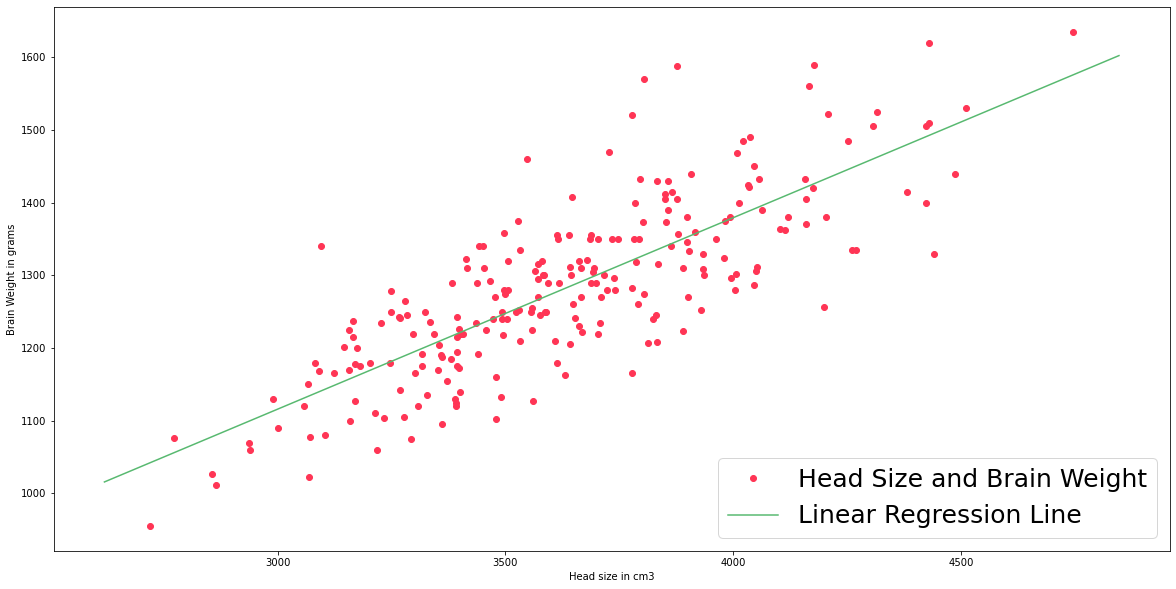

In [8]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(max_x, min_x, 1000)
y = m*x + c
plt.plot(X,Y, color = '#ff3555', linestyle = '', marker = 'o', label = 'Head Size and Brain Weight')
plt.plot(x,y, color = '#58b970', linestyle = '-', label = 'Linear Regression Line')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend(loc = 'lower right', prop={'size': 25})

##### Calculating the R squared to estimate the goodness of fit

In [9]:
numRs = 0
domRs = 0

nRs = len(X)
for i in range(nRs):
    Yp = m*X[i] + c
    numRs += (Yp - mean_y)**2
    domRs += (Y[i] - mean_y)**2

R_squared = numRs/domRs
print(R_squared)

0.6393117199570001


### Scikit Learn method

#### Linear Regression Scikit Learn model

In [10]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

max_x = np.max(X) + 100
min_x = np.min(X) - 100

X_topred = np.linspace(np.min(X), np.max(X), 1000)
X_topred = X_topred[:, np.newaxis]
model = LR()
#Regression Fitting
model.fit(X[:, np.newaxis], Y)
#Predicting
Y_pred = model.predict(X_topred)

#### Creating a plot with Data and LR

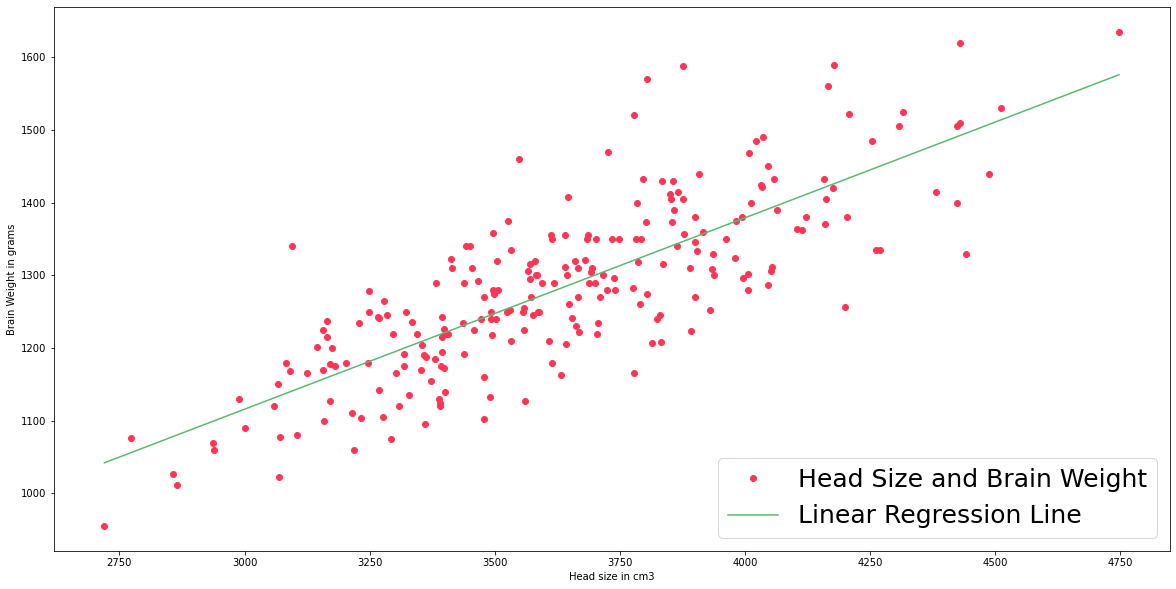

In [11]:
#creating a plot with data and LR
plt.plot(X,Y, color = '#ff3555', linestyle = '', marker = 'o', label = 'Head Size and Brain Weight')
plt.plot(X_topred,Y_pred, color = '#58b970', linestyle = '-', label = 'Linear Regression Line')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend(loc = 'lower right', prop={'size': 25})

#### Calculating the R squared to estimate the goodness of fit

In [12]:
#Calculating R2
r2_score = model.score(X[:,np.newaxis], Y)
print(r2_score)

0.639311719957


#### Little prediction

In [15]:
#Given head volume, predict the brain weight
headvol = 2356
Head_Volume = [[headvol]]
Head_Weight = model.predict(Head_Volume)
headw = round(Head_Weight[0],2) 
print('Brain weight for ' + str(headvol) +' cm3 is approximately ' + str(headw) + ' grams')

Brain weight for 2356 cm3 is approximately 946.21 grams


# <font color = orange> __Multiple Linear Regression__
___

**Multiple Linear Regression** is quite similar to the **Simple** one, there are just more **independent variables** taken to predict the **dependent variable value**

## Maths behind Multiple Linear Regression
Now the equation is given like:\
<font size = 3>$f(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \text{...} + \beta_nx_n + e$</font>\
\
in other words\
<font size = 3> $\hat{y} = \hat\beta_0 + \hat\beta_1x_1 + \hat\beta_2x_2 + \text{...} + \hat\beta_nx_n 
$</font>\
\
Where $\hat\beta_0, \hat\beta_1,\hat\beta_2, \space\text{...}\space, \hat\beta_n$ are the **parameters** we need to **estimate** for our $\hat{y}$\
$x_0, x_1, x_2, \space\text{...}\space, x_n $ are our **features** (we assume that we have $x_0$ that goes along with $\beta_0$ as $1$)\
And $e$ is our **error**\
\
Now we know that **multiple** points of data have **multiple** number of equations, so the **equations** can be **simplified** using **matrices**.\
\
Lets assume that\
\
<font size = 4.5>$y = \begin{bmatrix} 
y_1 \\
y_2 \\
y_3 \\
\text{...} \\
y_n
\end{bmatrix}, 
\space
X = \begin{bmatrix}
1 & X_{1\space1} & X_{1\space2} & X_{1\space3} & \text{.} & \text{.} & X_{1\space p}\\
1 & X_{2\space1} & X_{2\space2} & X_{2\space3} & \text{.} & \text{.} & X_{2\space p}\\
1 & X_{3\space1} & X_{3\space2} & X_{3\space3} & \text{.} & \text{.} & X_{3\space p}\\
\text{.} & \text{.} & \text{.} & \text{.} & \text{.} & \text{.} & \text{.}\\
1 & X_{n\space1} & X_{n\space2} & X_{n\space3} & \text{.} & \text{.} & X_{n\space p}
\end{bmatrix},
\space
\beta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\text{.} \\
\beta_p
\end{bmatrix},
\space \
e = \begin{bmatrix}
e_1 \\
e_2 \\
e_3 \\
\text{.} \\
e_n
\end{bmatrix}$</font>\
\
We can represent all our equations as:\
<font size = 4.5>$y = X\beta + e$</font>\
\
And\
<font size = 4.5>$\hat{y} = X\hat\beta$</font>
\
Where $\hat{y}$ is our value to predict, $\hat\beta$ is our parameter to estimate\
\
The errors equation is\
<font size = 4.5>$e = y - \hat{y}$</font>\
\
We need to minimize our errors, so equation is\
<font size = 4.5>$RSS = \sum \limits _{i = 1} ^ {n} e_i^2$</font>\
\
RSS in matrix can also be written as $e^Te$(thus, in every matrix element we will have $e_i^2$), and becomes
\
<font size = 4.5>$
RSS = e^Te = (y-\hat{y})^T(y-\hat{y}) = (y- X\hat\beta)^T(y- X\hat\beta) = 
(y^T- \hat{\beta^T}X^T)(y- X\hat\beta)$</font>\
\
So our RSS formula is\
<font size = 4.5>$RSS = y^Ty - y^T X\hat\beta - \hat{\beta^T} X^Ty + \hat{\beta^T}X^T X\hat\beta$</font>\
\
\
To find the minimum of RSS we need to take a derivative of RSS with respect to $\hat\beta$\
<font size = 4.5>$\frac{\partial (RSS)}{\partial (\hat\beta)} = 0 - y^TX - (X^Ty)^T + 2 \hat{\beta^T} X^T X \\
\frac{\partial (RSS)}{\partial (\hat\beta)} = - y^TX - y^TX + 2\hat{\beta^T} X^T X \\
\frac{\partial (RSS)}{\partial (\hat\beta)} = 2\hat{\beta^T} X^T X - 2 y^TX$</font>\
\
And equal it to zero\
<font size = 4.5>$2 \hat{\beta^T} X^T X - 2y^TX = 0 \\
2\hat{\beta^T} X^T X =  2y^TX \\
\hat{\beta^T} X^T X =  y^TX \\
\hat{\beta^T} = y^TX(X^TX)^{-1} \\
\hat \beta = (X^TX)^{-1}X^Ty
$</font>\
\
So formula to estimate $\hat\beta$ is\
<font size = 4.5>$\hat \beta = (X^TX)^{-1}X^Ty$</font>\
\
To predict the outcome we will have:\
<font size = 4.5>$\hat{y} = X\hat \beta$</font>\
\
Where in matrix $X$ we can include multiple features